In [314]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [315]:
testperson = 17

In [316]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Filip_17.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.275985,1,1,-84.953583,123.877739,587.438293,-21.931137,128.628098,594.137390,0.704829,...,3.111191,3.390961,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
1,0.285955,1,1,-85.036987,123.897720,587.515137,-22.005192,128.675522,594.215210,0.705004,...,3.111969,3.389542,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
2,0.296928,1,1,-85.238632,123.923134,587.692871,-22.173212,128.753311,594.399048,0.705431,...,3.110428,3.385178,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
3,0.306899,1,1,-85.238632,123.923134,587.692871,-22.215878,128.761795,594.401428,0.705431,...,3.110428,3.387543,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
4,0.318798,1,1,-85.285217,123.903152,587.665710,-22.268866,128.765533,594.391113,0.705553,...,3.107742,3.383621,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
5,0.329768,1,1,-85.381424,123.844421,587.619263,-22.387552,128.773331,594.376038,0.705805,...,3.109085,3.380661,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
6,0.340854,1,1,-85.381424,123.844421,587.619263,-22.412426,128.770126,594.360657,0.705805,...,3.109085,3.381165,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
7,0.352833,1,1,-85.385849,123.800621,587.557190,-22.435308,128.755890,594.310669,0.705839,...,3.111023,3.382462,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
8,0.363766,1,1,-85.402084,123.698349,587.477722,-22.485552,128.729462,594.260620,0.705909,...,3.106277,3.379242,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive
9,0.374779,1,1,-85.402084,123.698349,587.477722,-22.505230,128.729660,594.285278,0.705909,...,3.106277,3.370316,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive


In [317]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(122899, 39)

In [318]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P06_text.txt', 'AI_HC_P06_MCQ.txt', 'AI_HC_P06_FIBQ.txt',
       'OR_HC_P06_text.txt', 'OR_HC_P06_MCQ.txt', 'OR_HC_P06_FIBQ.txt',
       'AI_SK_P06_text.txt', 'AI_SK_P06_MCQ.txt', 'AI_SK_P06_FIBQ.txt',
       'OR_SK_P06_text.txt', 'OR_SK_P06_MCQ.txt', 'OR_SK_P06_FIBQ.txt',
       'AI_KB_P06_text.txt', 'AI_KB_P06_MCQ.txt', 'AI_KB_P06_FIBQ.txt',
       'OR_KB_P06_text.txt', 'OR_KB_P06_MCQ.txt', 'OR_KB_P06_FIBQ.txt'],
      dtype=object)

In [319]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-128.211411,122.392059,573.431824,-65.527504,128.867920,585.370728,0.817219,...,3.018158,3.119034,True,OR_SK_P06_text.txt,6.0,20.0,Times New Roman,SK,False,Immersive
1,0.009765,1,1,-128.211411,122.392059,573.431824,-65.527504,128.867920,585.370728,0.817219,...,3.018158,3.119034,True,OR_SK_P06_text.txt,6.0,20.0,Times New Roman,SK,False,Immersive
2,0.022737,1,1,-128.324173,122.212395,573.413574,-65.675201,128.761490,585.349548,0.817517,...,3.031403,3.127762,True,OR_SK_P06_text.txt,6.0,20.0,Times New Roman,SK,False,Immersive
3,0.033414,1,1,-128.716309,121.695641,573.355286,-66.117630,128.496246,585.318787,0.818545,...,3.038498,3.138092,True,OR_SK_P06_text.txt,6.0,20.0,Times New Roman,SK,False,Immersive
4,0.043472,1,1,-128.716309,121.695641,573.355286,-66.117630,128.496246,585.318787,0.818545,...,3.038498,3.138092,True,OR_SK_P06_text.txt,6.0,20.0,Times New Roman,SK,False,Immersive


In [320]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1198.540573,1221.201401,250.542011,274.087515
1,0.009765,1198.540573,1221.201401,250.542011,274.087515
2,0.022737,1195.242157,1220.338211,255.391917,274.830594
3,0.033414,1194.437866,1215.380402,265.305727,281.271415
4,0.043472,1194.437866,1215.380402,265.305727,281.271415
...,...,...,...,...,...
16761,196.854275,1212.605820,1226.003952,925.092258,911.008301
16762,196.866143,1213.598709,1229.405975,923.123388,909.003468
16763,196.876628,1220.799255,1229.850540,927.896261,912.202463
16764,196.887639,1218.332901,1229.850540,926.872473,912.202463


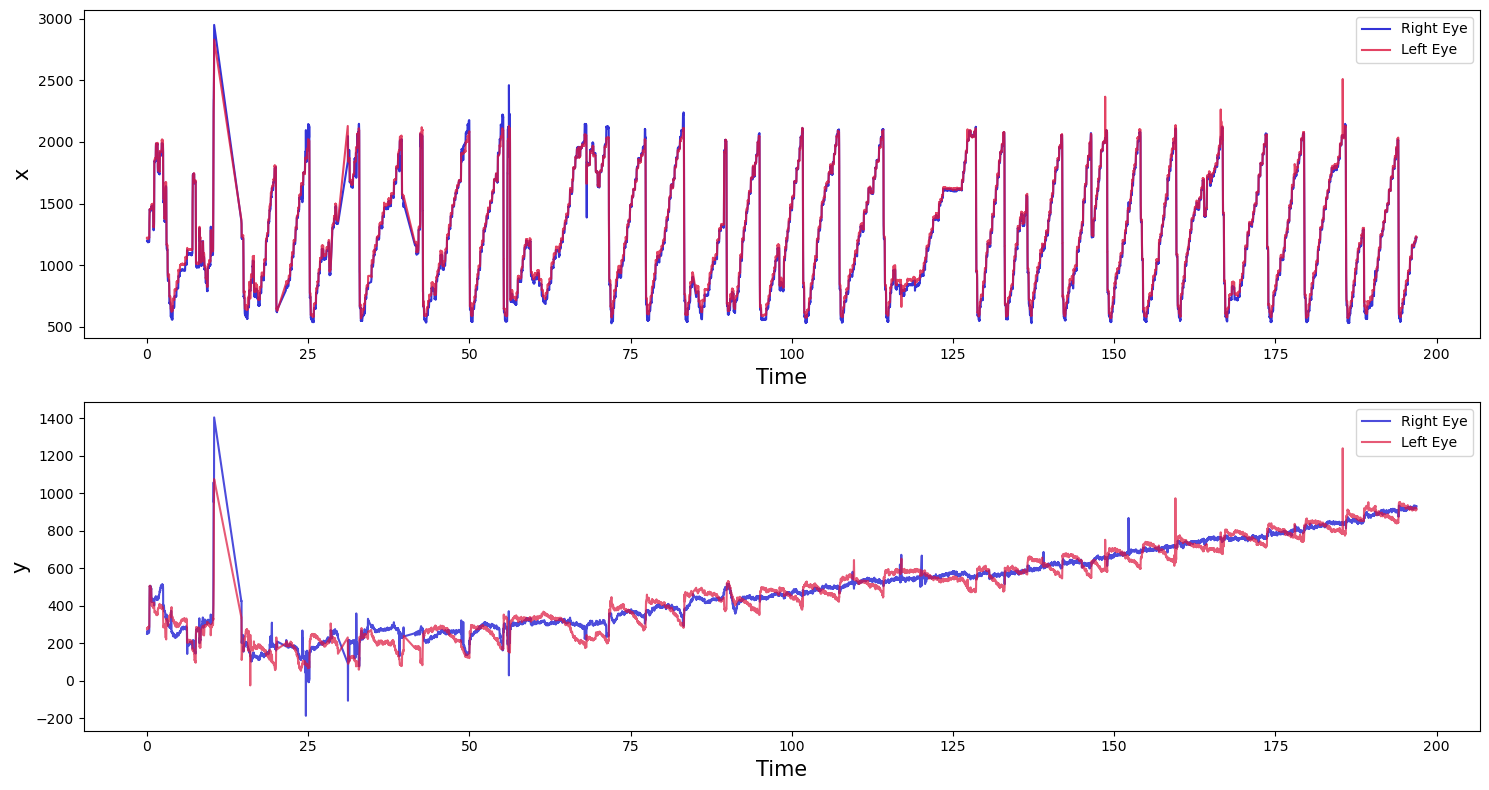

In [321]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [322]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [323]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [324]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [325]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,793.448410,840.987396,248.987768,300.157557
1,0.011355,798.091202,834.151611,256.738043,300.729747
2,0.021603,795.751343,834.151611,252.979088,300.729747
3,0.033711,813.218842,855.986862,250.022328,298.819542
4,0.044683,870.169830,928.503265,252.273839,289.809980
...,...,...,...,...,...
928,10.436973,809.374924,844.088669,628.356729,659.103427
929,10.447686,822.731552,844.088669,619.390640,659.103427
930,10.459602,839.200592,860.278702,607.993784,645.124826
931,10.469574,861.482849,891.470032,589.372816,625.093832


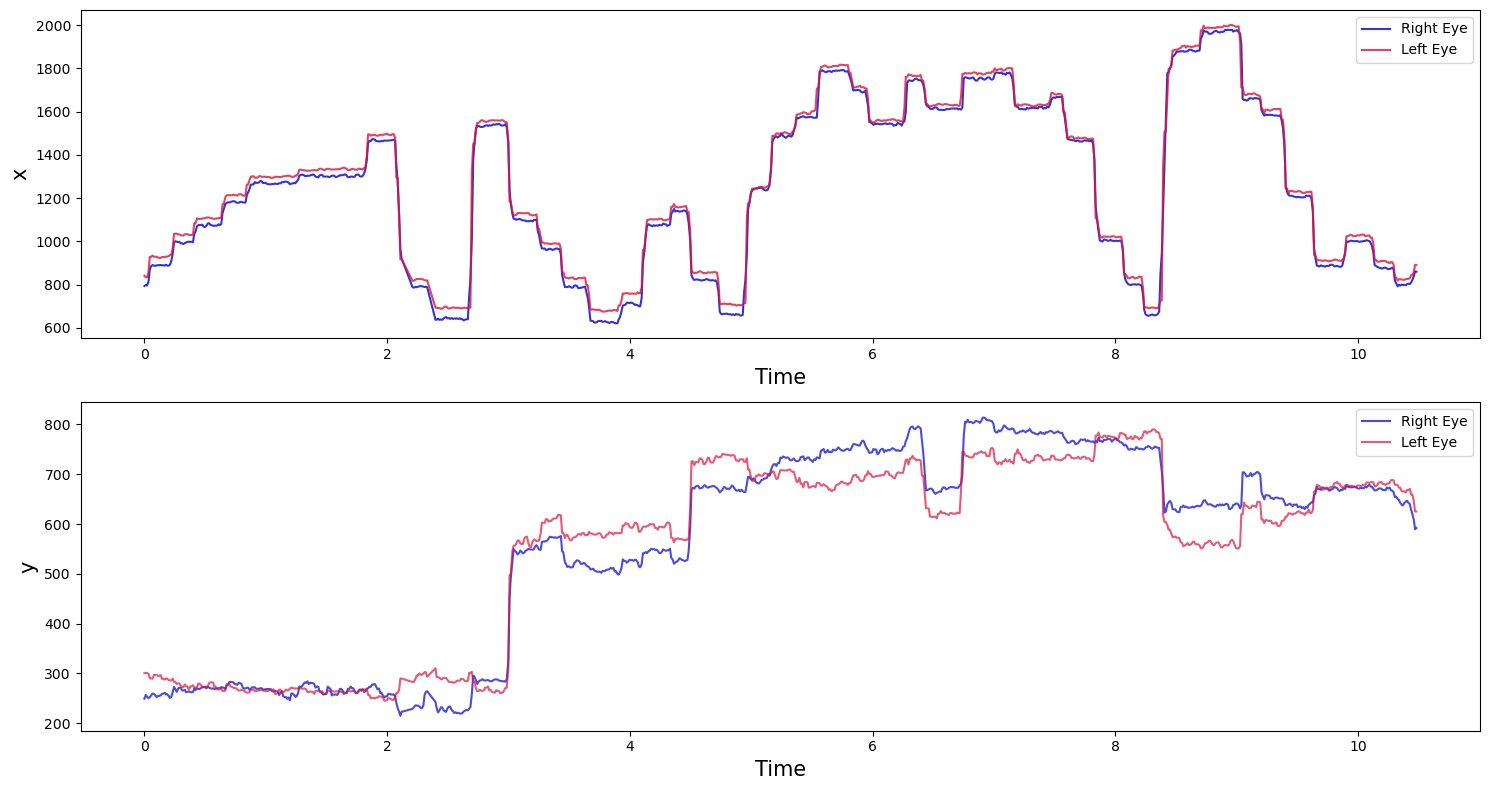

In [326]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


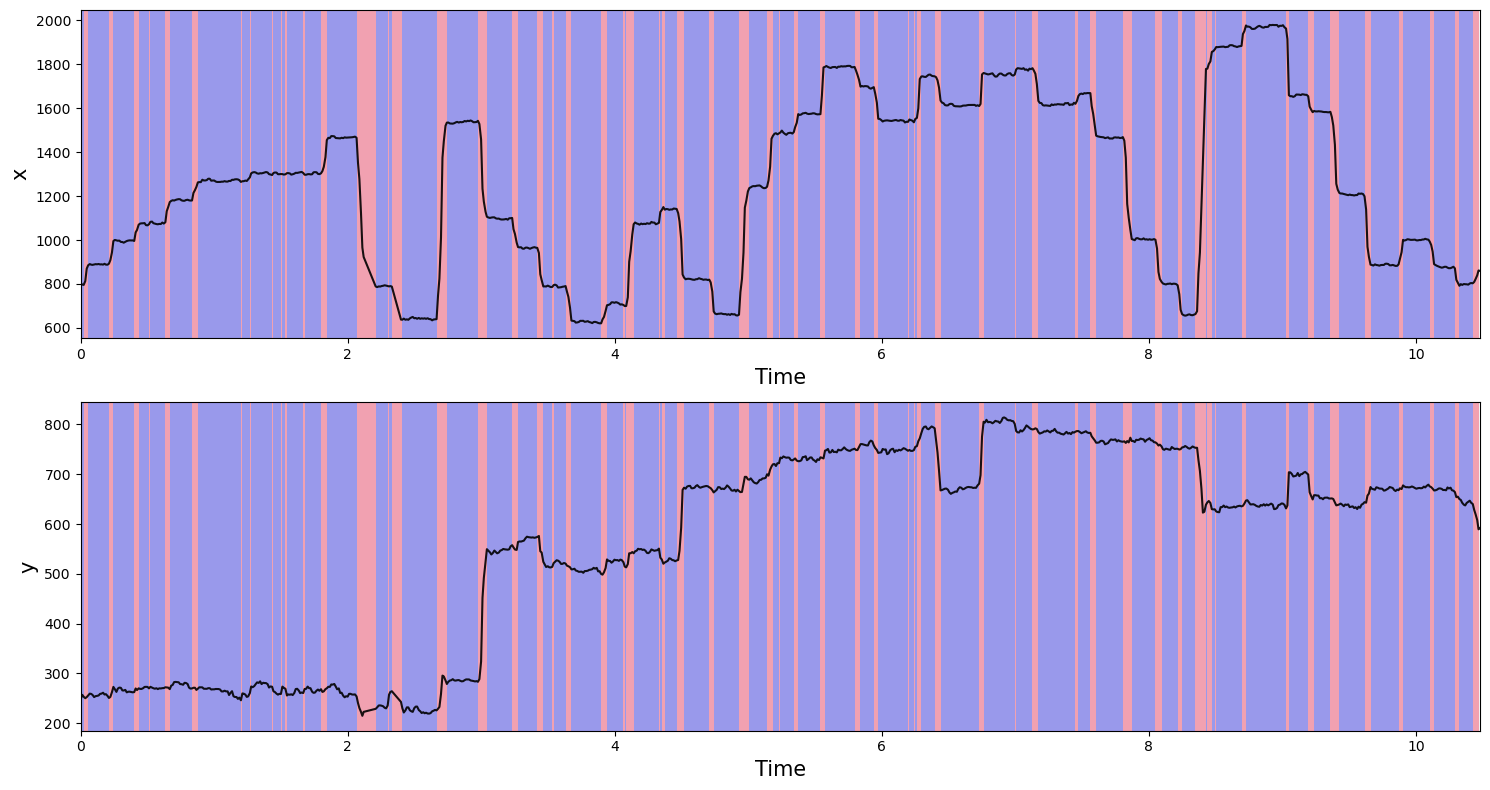

In [327]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [328]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [329]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-141.014374,132.718887,562.058777,-80.038513,135.629791,574.955811,0.855548,...,2.988892,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,0
1,0.009502,1,1,-141.014374,132.718887,562.058777,-80.038513,135.629791,574.955811,0.855548,...,2.988892,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,0
2,0.022318,1,1,-140.965439,132.894577,562.251526,-79.992676,135.748627,575.113892,0.855296,...,2.995361,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,0
3,0.033221,1,1,-141.164017,133.682556,564.392822,-79.967323,136.437119,577.277100,0.854429,...,3.008682,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,1
4,0.043241,1,1,-141.164017,133.682556,564.392822,-79.967323,136.437119,577.277100,0.854429,...,3.008682,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,4.196145,1,1,-160.504089,136.556290,586.541016,-99.253609,146.821503,602.545227,0.888060,...,3.091949,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,1
289,4.206323,1,1,-160.504089,136.556290,586.541016,-99.253609,146.821503,602.545227,0.888060,...,3.091949,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,1
290,4.218650,1,1,-160.467834,136.560806,586.568787,-99.171188,146.830185,602.579163,0.887954,...,3.091217,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,0
291,4.229708,1,1,-160.273392,136.476746,586.406677,-98.859993,146.762589,602.419861,0.887591,...,3.089050,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Skimming,1


In [330]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [331]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-84.953583,123.877739,587.438293,-21.931137,128.628098,594.137390,0.704829,...,3.390961,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
1,0.009970,1,1,-85.036987,123.897720,587.515137,-22.005192,128.675522,594.215210,0.705004,...,3.389542,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
2,0.020943,1,1,-85.238632,123.923134,587.692871,-22.173212,128.753311,594.399048,0.705431,...,3.385178,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
3,0.030914,1,1,-85.238632,123.923134,587.692871,-22.215878,128.761795,594.401428,0.705431,...,3.387543,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
4,0.042813,1,1,-85.285217,123.903152,587.665710,-22.268866,128.765533,594.391113,0.705553,...,3.383621,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,46.142518,1,1,-100.077454,120.588951,586.004272,-36.802361,126.984055,594.502502,0.742195,...,2.920105,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,0
4008,46.154563,1,1,-100.104858,120.538803,585.974976,-36.827618,126.968079,594.494873,0.742275,...,2.923645,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
4009,46.165193,1,1,-100.045959,120.239700,584.810242,-36.865379,126.757355,593.553162,0.742619,...,2.926697,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1
4010,46.175677,1,1,-100.045959,120.239700,584.810242,-36.878944,126.727318,593.412659,0.742619,...,2.922943,True,AI_HC_P06_text.txt,6.0,20.0,Times New Roman,HC,False,Immersive,1


In [332]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [333]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [334]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")